# Taslima Akter, ID - 3040384

# Load Classification Dataset

(Get training and test dataset here)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10

# Get training and test dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Define class names

In [2]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Sample images from the dataset

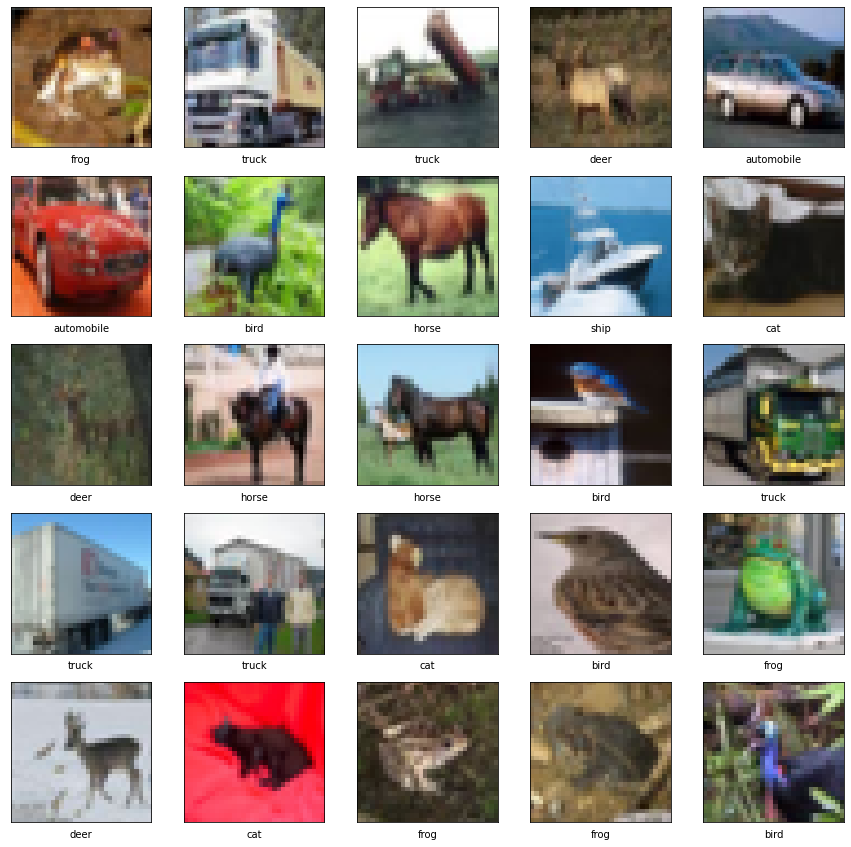

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Feature scale images

In [4]:
#The following command puts all images in the range [0, 1] since images take on values of range [0, 255]

train_images = train_images / 255.0

test_images = test_images / 255.0

# Without Regularization

## Testing with Sigmoid

### Create model Definition 
  - Use tf.keras.layers.Flatten for the input layer 
  - Use Dense layers with sizes: [128, 64] respectively
     - Use glorot_uniform(xavier initialization) kernel_initializer
     - Use zero initialization for biases
     - Use sigmoid as activation function
  - Use Dense layer with softmax activation for output layer with size 10
     - Use glorot_uniform(xavier initialization) kernel_initializer
     - Use zero initialization for biases
     - Use softmax as activation function

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='sigmoid',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros'),
    tf.keras.layers.Dense(64, activation='sigmoid', 
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros'),
    tf.keras.layers.Dense(10, activation='softmax', 
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros')
])

### Compile model
   - Use sgd as optimizer
      - Use learning rate of 0.01
   - Use SparseCategoricalCrossentropy(log loss) as loss
   - Use accuracy as metric

In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD'),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit model here
  - Use validation split of 0.2 
  - Train for 100 epochs

In [7]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2591 - accuracy: 0.1879 - val_loss: 2.1995 - val_accuracy: 0.2408
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1363 - accuracy: 0.2641 - val_loss: 2.0801 - val_accuracy: 0.2795
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0357 - accuracy: 0.2895 - val_loss: 2.0080 - val_accuracy: 0.2920
Epoch 4/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.9710 - accuracy: 0.3058 - val_loss: 1.9536 - val_accuracy: 0.3125
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9274 - accuracy: 0.3206 - val_loss: 1.9190 - val_accuracy: 0.3217
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8960 - accuracy: 0.3313 - val_loss: 1.8956 - val_accuracy: 0.3277
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8725 - accuracy: 0.3408 - val_loss: 1.8750 - val_ac

### Plot your training and validation  accuracy

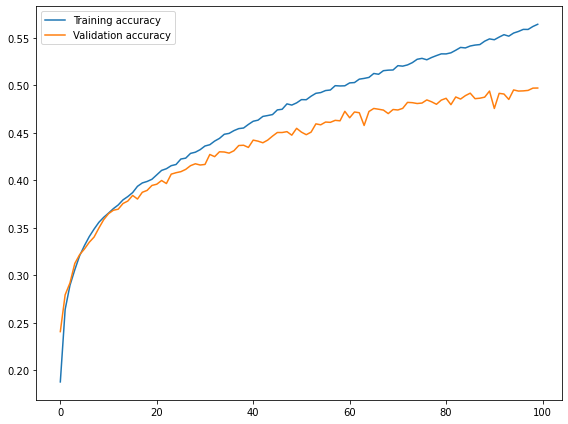

In [8]:
import numpy as np
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Training accuracy")
ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
        label="Validation accuracy")
ax.legend()

plt.tight_layout()
plt.show()

### Evaluate test dataset using fit model
Print test loss and test accuracy

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 1.3963 - accuracy: 0.5106 - 549ms/epoch - 2ms/step


## Testing with Relu

### Create model Definition 
  - Use tf.keras.layers.Flatten for the input layer 
  - Use Dense layers with sizes: [128, 64] respectively
     - Use he_uniform as kernel_initializer
     - Use zero initialization for biases
     - Use relu as activation function
  - Use Dense layer with softmax activation for output layer with size 10
     - Use glorot_uniform as kernel_initializer
     - Use zero initialization for biases
     - Use softmax as activation function

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros'),
    tf.keras.layers.Dense(64, activation='relu', 
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros'),
    tf.keras.layers.Dense(10, activation='softmax', 
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros')
])

### Compile model
   - Use sgd as optimizer
      - Use learning rate of 0.01
   - Use SparseCategoricalCrossentropy(log loss) as loss
   - Use accuracy as metric

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD'),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit model here
  - Use validation split of 0.2 
  - Train for 100 epochs

In [12]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9137 - accuracy: 0.3092 - val_loss: 1.7926 - val_accuracy: 0.3520
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7335 - accuracy: 0.3828 - val_loss: 1.7361 - val_accuracy: 0.3819
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6565 - accuracy: 0.4117 - val_loss: 1.6829 - val_accuracy: 0.4033
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6037 - accuracy: 0.4302 - val_loss: 1.6112 - val_accuracy: 0.4305
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5633 - accuracy: 0.4421 - val_loss: 1.7165 - val_accuracy: 0.3969
Epoch 6/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5279 - accuracy: 0.4555 - val_loss: 1.5881 - val_accuracy: 0.4372
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4995 - accuracy: 0.4673 - val_loss: 1.5445 - val_ac

### Plot your training and validation  accuracy

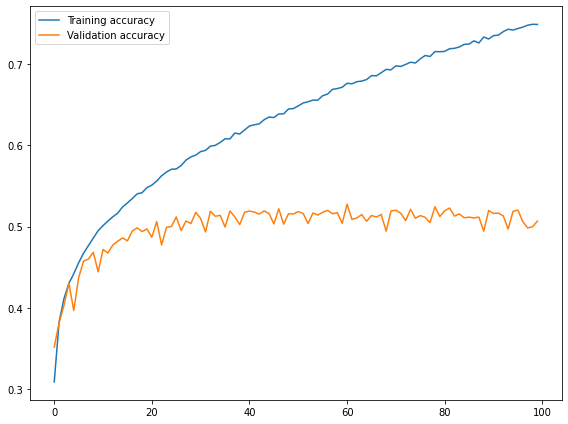

In [13]:
import numpy as np
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Training accuracy")
ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
        label="Validation accuracy")
ax.legend()

plt.tight_layout()
plt.show()

### Evaluate test dataset using fit dataset
Print test loss and test accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 1.8010 - accuracy: 0.4926 - 619ms/epoch - 2ms/step


# With Regularization

## Testing with Sigmoid

### Create model Definition 
  - Use tf.keras.layers.Flatten for the input layer 
  - Use Dense layers with sizes: [128, 64] respectively
     - Use glorot_uniform(xavier initialization) kernel_initializer
     - Use zero initialization for biases
     - Use sigmoid as activation function
     - Use L2 regularization with weight 0.001
  - Use Dense layer with softmax activation for output layer with size 10
     - Use glorot_uniform(xavier initialization) kernel_initializer
     - Use zero initialization for biases
     - Use softmax as activation function
     - Use L2 regularization with weight 0.001

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='sigmoid',
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.001)
                          ),
    tf.keras.layers.Dense(64, activation='sigmoid', 
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax', 
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.001))
])

### Compile model
   - Use sgd as optimizer
      - Use learning rate of 0.01
   - Use SparseCategoricalCrossentropy(log loss) as loss
   - Use accuracy as metric

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD'),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit model here
  - Use validation split of 0.2 
  - Train for 100 epochs

In [17]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.6122 - accuracy: 0.1791 - val_loss: 2.5551 - val_accuracy: 0.2239
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.4984 - accuracy: 0.2516 - val_loss: 2.4441 - val_accuracy: 0.2671
Epoch 3/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.3986 - accuracy: 0.2749 - val_loss: 2.3623 - val_accuracy: 0.2879
Epoch 4/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.3278 - accuracy: 0.2909 - val_loss: 2.3062 - val_accuracy: 0.2978
Epoch 5/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2764 - accuracy: 0.3048 - val_loss: 2.2621 - val_accuracy: 0.3094
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2372 - accuracy: 0.3109 - val_loss: 2.2305 - val_accuracy: 0.3131
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2067 - accuracy: 0.3203 - val_loss: 2.2040 - val_ac

### Plot your training and validation  accuracy

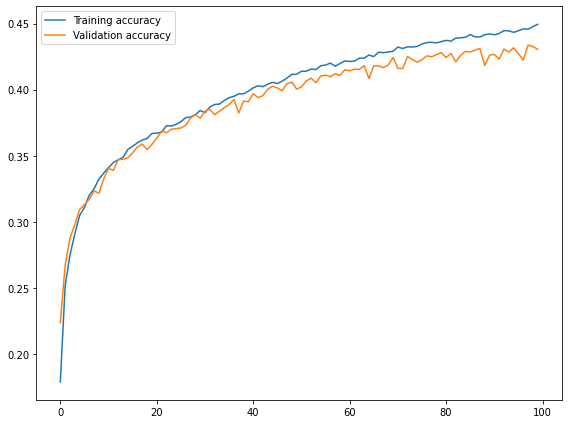

In [18]:
import numpy as np
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Training accuracy")
ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
        label="Validation accuracy")
ax.legend()

plt.tight_layout()
plt.show()

### Evaluate test dataset using fit dataset
Print test loss and test accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.8020 - accuracy: 0.4302 - 631ms/epoch - 2ms/step


## Testing with Relu

### Create model Definition 
  - Use tf.keras.layers.Flatten for the input layer 
  - Use Dense layers with sizes: [128, 64] respectively
     - Use he_uniform as kernel_initializer
     - Use zero initialization for biases
     - Use relu as activation function
     - Use L2 regularization with weight 0.005
  - Use Dense layer with softmax activation for output layer with size 10
     - Use glorot_uniform as kernel_initializer
     - Use zero initialization for biases
     - Use softmax as activation function
     - Use L2 regularization with weight 0.005

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.005)
                          ),
    tf.keras.layers.Dense(64, activation='relu', 
                          kernel_initializer='he_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.005)),
    tf.keras.layers.Dense(10, activation='softmax', 
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          kernel_regularizer=tf.keras.regularizers.L2(0.005))
])

### Compile model
   - Use sgd as optimizer
      - Use learning rate of 0.01
   - Use SparseCategoricalCrossentropy(log loss) as loss
   - Use accuracy as metric

In [21]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, name='SGD'),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit model here
  - Use validation split of 0.2 
  - Train for 100 epochs

In [22]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 3.7174 - accuracy: 0.3099 - val_loss: 3.3955 - val_accuracy: 0.3632
Epoch 2/100
1250/1250 [==============================] - 7s 5ms/step - loss: 3.1855 - accuracy: 0.3772 - val_loss: 3.0489 - val_accuracy: 0.3692
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.8398 - accuracy: 0.4004 - val_loss: 2.7574 - val_accuracy: 0.3856
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.5870 - accuracy: 0.4139 - val_loss: 2.5211 - val_accuracy: 0.4111
Epoch 5/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.3944 - accuracy: 0.4224 - val_loss: 2.3599 - val_accuracy: 0.4050
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2461 - accuracy: 0.4302 - val_loss: 2.2647 - val_accuracy: 0.3979
Epoch 7/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.1340 - accuracy: 0.4333 - val_loss: 2.1065 - val_ac

### Plot your training and validation  accuracy

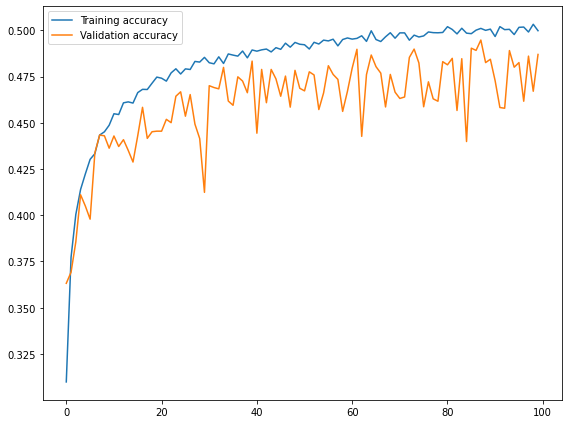

In [23]:
import numpy as np
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Training accuracy")
ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
        label="Validation accuracy")
ax.legend()

plt.tight_layout()
plt.show()

### Evaluate test dataset using fit dataset
Print test loss and test accuracy

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 1.6991 - accuracy: 0.4970 - 591ms/epoch - 2ms/step
